 **IMPORTING PYTHON LIBRARIES AND THE DATASET**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataframe
df=pd.read_csv(r'file.csv',encoding='unicode_escape')

1. **PERFORMING BASIC EDA**

In [3]:
# Dsiplaying the number of rows and columns present in the dataframe respectively
df.shape

(8784, 8)

In [4]:
# Names of all the columns present in the dataframe
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [5]:
# Basic information about the dataframe df: rows , columns , types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
# First 5 records present in the dataframe df
df.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog

In [7]:
#Calculating the mean value of some important parameters in the dataframe df : TEMPERATURE , WIND SPEED , PRESSURE
df[['Temp_C','Wind Speed_km/h','Rel Hum_%']].mean()

Temp_C              8.798144
Wind Speed_km/h    14.945469
Rel Hum_%          67.431694
dtype: float64

In [8]:
#The weather type with the highest frequency in the dataframe df.
df['Weather'].mode()

0    Mainly Clear
Name: Weather, dtype: object

In [9]:
# Number of times the weather condition was 'CLEAR'
len(df[(df.Weather=='Clear')])

1326

In [10]:
#descriptive statistics for all columns in the DataFrame df, including both numerical and categorical data.
df.describe(include='all')

Date/Time       Temp_C  Dew Point Temp_C    Rel Hum_%  \
count            8784  8784.000000       8784.000000  8784.000000   
unique           8784          NaN               NaN          NaN   
top     1/1/2012 0:00          NaN               NaN          NaN   
freq                1          NaN               NaN          NaN   
mean              NaN     8.798144          2.555294    67.431694   
std               NaN    11.687883         10.883072    16.918881   
min               NaN   -23.300000        -28.500000    18.000000   
25%               NaN     0.100000         -5.900000    56.000000   
50%               NaN     9.300000          3.300000    68.000000   
75%               NaN    18.800000         11.800000    81.000000   
max               NaN    33.000000         24.400000   100.000000   

        Wind Speed_km/h  Visibility_km    Press_kPa       Weather  
count       8784.000000    8784.000000  8784.000000          8784  
unique              NaN            NaN          NaN            50  
top                 NaN            NaN          NaN  Mainly Clear  
freq                NaN            NaN          NaN          2106  
mean          14.945469      27.664447   101.051623           NaN  
std            8.688696      12.622688     0.844005           NaN  
min            0.000000       0.200000    97.520000           NaN  
25%            9.000000      24.100000   100.560000           NaN  
50%           13.000000      25.000000   101.070000           NaN  
75%           20.000000      25.000000   101.590000           NaN  
max           83.000000      48.300000   103.650000           NaN

From above we can conclude that:
1.The mean temperature throught the dataset was 8.798144°C
2.The mean wind speed throught the dataset was  14.945469 km/hour
3.The mean relative humidity throught the dataset was 67.431694 %
4.The weather was 'mainly clear' maximun number of times.

3. **DATA PREPARATION**

In [11]:
# checking for any null values in the dataframe
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [12]:
# Changing the data type of 'Date/Time' column from object to datetime

df['Date/Time']=df['Date/Time'].astype('datetime64[s]')

In [13]:
# List of all weather conditions in the dataframe
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [14]:
#As we can see our dataframe is showing a vast majority of weather conditions but our focus will only be on the Major Weather conditions

# List of weather types to include
major_weather_types = ['Clear', 'Cloudy', 'Rain', 'Snow', 'Fog', 'Thunderstorms', 'Haze' ,'Mostly Cloudy','Mainly Clear'


]

#Filter the DataFrame to include only the specified weather types into a new dataframe named 'df1'
df1 = df[df['Weather'].isin(major_weather_types)]

#while filtering out the dataframe the index value must also be corrected
df1.reset_index(drop=True, inplace=True)
df1.shape


(8093, 8)

4. **VISUALIZING KEY STATISTICS**

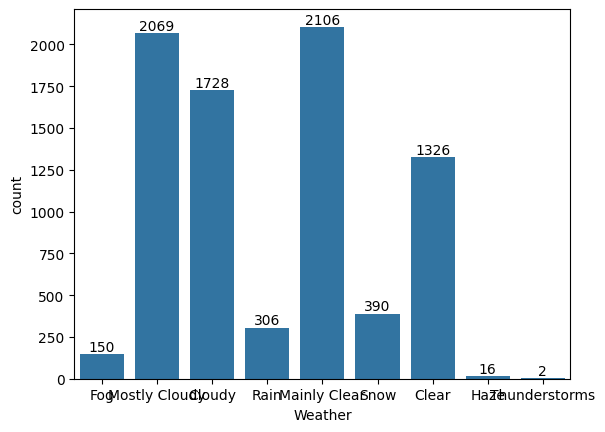

In [15]:
ax = sns.countplot(x='Weather', data=df1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#This shows the number of times each weather condition was observed in our dataframe df1
#Again we can see that for the majority of the times the weather condition was 'Mainly Clear'


Text(0, 0.5, 'Number of Days')

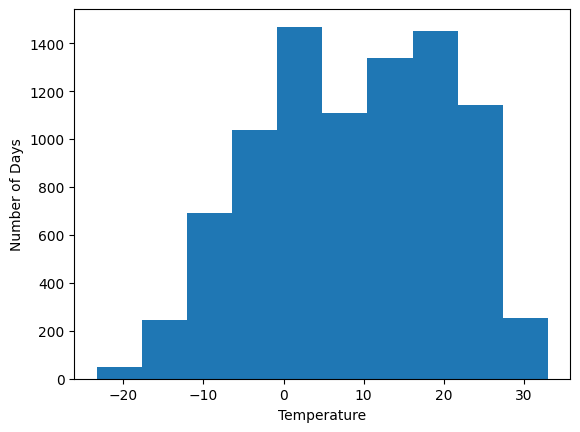

In [16]:
bx=plt.hist(df['Temp_C'])
plt.xlabel('Temperature')
plt.ylabel('Number of Days')

#This gives us an idea od the frequency of the temperature that was recored throughout the dataframe df
#We can see that for the majority of the days the recorded temperature was between 0°C to 5°C.


In [17]:
# Creating bins i.e creating a new column that categorizes the temperature dataset into on of the 3 categories

bins = np.linspace(min(df['Temp_C']), max(df['Temp_C']), 4)
temp_groups = ['Low', 'Medium', 'High']
df['Temp_Binned'] = pd.cut(df['Temp_C'], bins=bins, labels=temp_groups, include_lowest=True)

# Get the counts of each bin
temp_counts = df['Temp_Binned'].value_counts().reindex(temp_groups)




In [18]:
df['Temp_Binned'].unique()


['Medium', 'Low', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

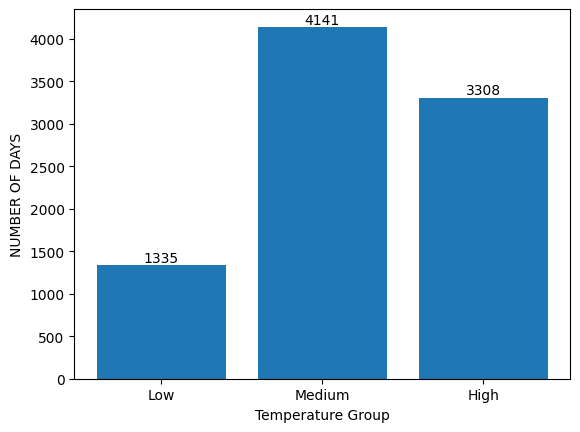

In [19]:
# Plot the bar chart for the binned temperature values observed in our dataframe df
plt.bar(temp_groups, temp_counts)

# Label the axes
plt.xlabel('Temperature Group')
plt.ylabel('NUMBER OF DAYS')

# Add labels to each bar
for i, count in enumerate(temp_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

#We can see that for the majority of the days the temperature was 'Moderate'

In [20]:
# Create bins for the Wind Speed data.

bins2 = np.linspace(min(df['Wind Speed_km/h']), max(df['Wind Speed_km/h']), 4)
wind_groups = ['Slow', 'Moderate', 'Fast']
df['Wind_Binned'] = pd.cut(df['Wind Speed_km/h'], bins=bins2, labels=wind_groups, include_lowest=True)
wind_counts = df['Wind_Binned'].value_counts().reindex(wind_groups)


In [21]:
df['Wind_Binned'].unique()

['Slow', 'Moderate', 'Fast']
Categories (3, object): ['Slow' < 'Moderate' < 'Fast']

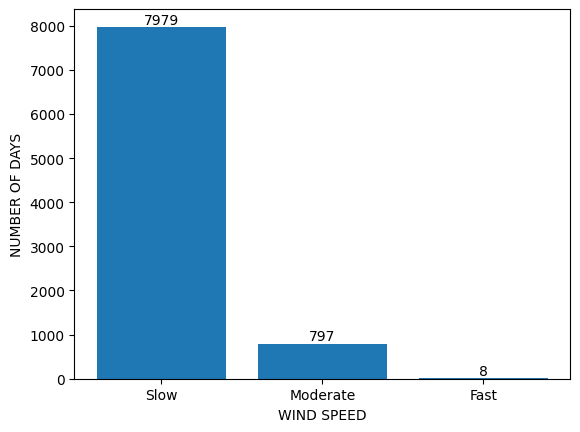

In [22]:
# Plot the bar chart
plt.bar(wind_groups, wind_counts)

plt.xlabel('WIND SPEED')
plt.ylabel('NUMBER OF DAYS')

for i, count in enumerate(wind_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.show()

#Thus we can say that almost everyday the wind speed observed was 'Slow'.

In [23]:
# Group the dataframe df1 on the basis of 'Weather' and find the mean temparature for each weather condition 
temp_weather = df1.groupby('Weather', as_index=False)['Temp_C'].mean().sort_values(by='Temp_C', ascending=False)

# Create the bar plot
sns.barplot(x='Weather', y='Temp_C', data=temp_weather)
sns.set(rc={'figure.figsize':(10,8)})

# Label the axes
plt.xlabel('Weather')
plt.ylabel('Average Temperature')


# Show the plot
plt.show()

##CONCLUSION
#we can conclude that Thunderstroms were accompanied with highest mean temperature will snowy days had the lowest mean temperature.


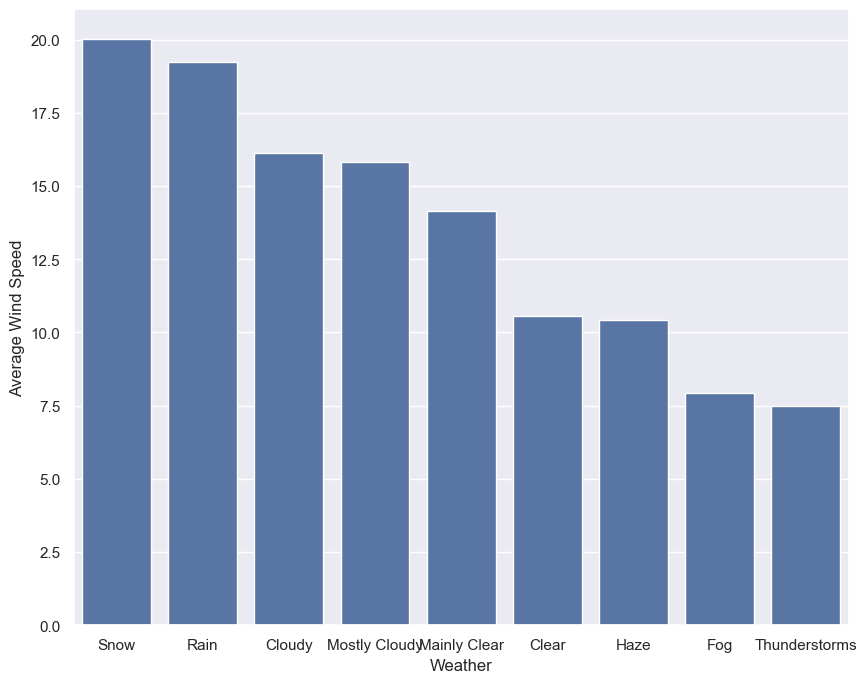

In [24]:
# Group the dataframe df1 on the basis of 'Weather' and find the mean Wind Speed for each weather condition 
temp_weather = df1.groupby('Weather', as_index=False)['Wind Speed_km/h'].mean().sort_values(by='Wind Speed_km/h', ascending=False)

# Create the bar plot
sns.barplot(x='Weather', y='Wind Speed_km/h', data=temp_weather)

# Label the axes
plt.xlabel('Weather')
plt.ylabel('Average Wind Speed')

# Show the plot
plt.show()

##CONCLUSION
#Snowy days had the highest mean wind speed while thunderstorms had the mowest mean wind speed

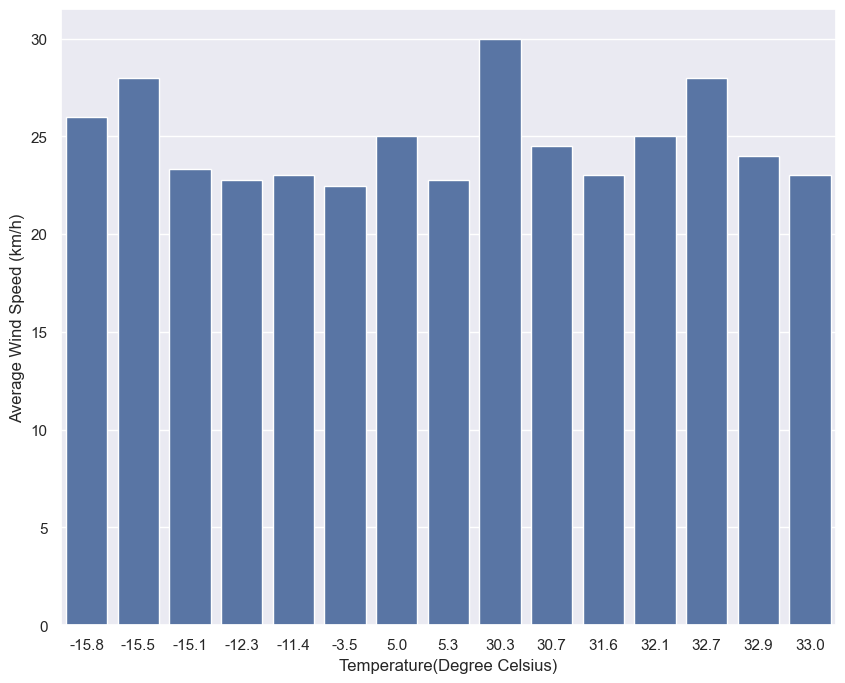

In [25]:
wind_temp=df.groupby(['Temp_C'],as_index=False)['Wind Speed_km/h'].mean().sort_values(by='Wind Speed_km/h',ascending=False).head(15)
sns.barplot(x='Temp_C',y='Wind Speed_km/h',data=wind_temp)

plt.xlabel('Temperature(Degree Celsius)')
plt.ylabel('Average Wind Speed (km/h)')
plt.show()

#It shows a relationship btw temparture and the associated average wind speed

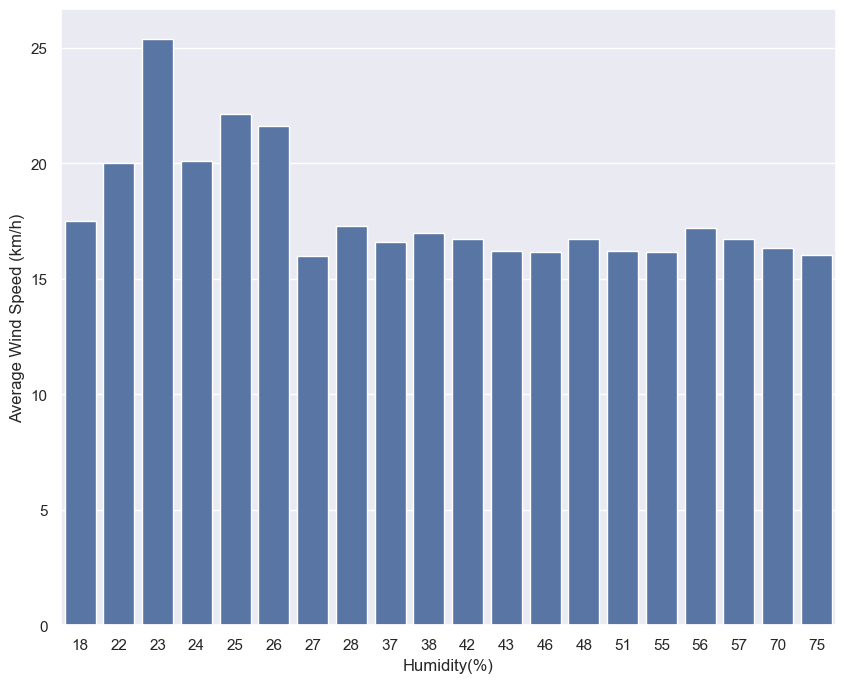

In [26]:
wind_humid=df.groupby(['Rel Hum_%'],as_index=False)['Wind Speed_km/h'].mean().sort_values(by='Wind Speed_km/h',ascending=False).head(20)
sns.barplot(x='Rel Hum_%',y='Wind Speed_km/h',data=wind_humid)
plt.xlabel('Humidity(%)')
plt.ylabel('Average Wind Speed (km/h)')
plt.show()

#It shows the relationship bwteen the humidity and the average wind speed

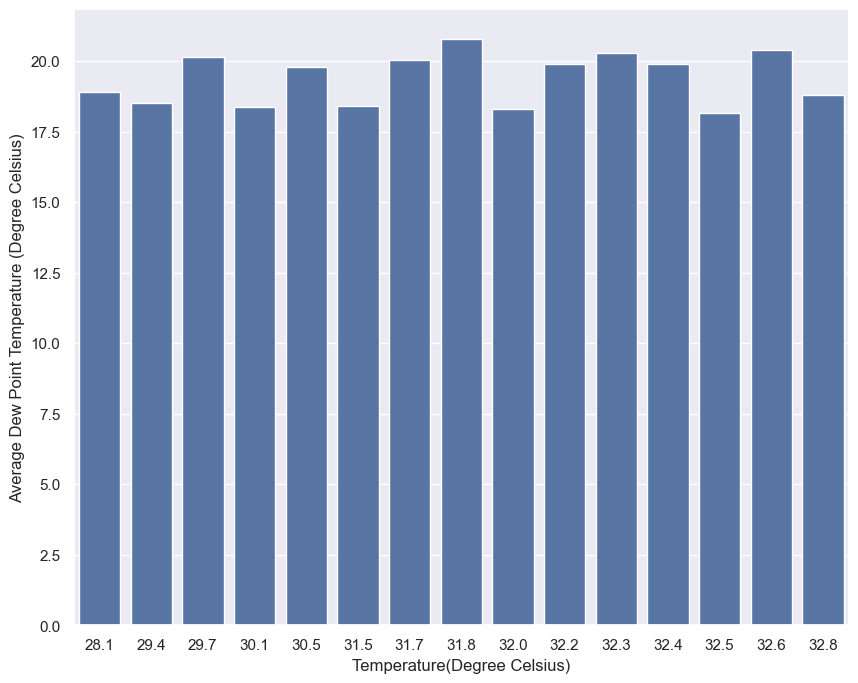

In [27]:
dewtemp_temp=df.groupby(['Temp_C'],as_index=False)['Dew Point Temp_C'].mean().sort_values(by='Dew Point Temp_C',ascending=False).head(15)
sns.barplot(x='Temp_C',y='Dew Point Temp_C',data=dewtemp_temp)
plt.xlabel('Temperature(Degree Celsius)')
plt.ylabel('Average Dew Point Temperature (Degree Celsius)')
plt.show()

In [28]:
#First we filter out our dataframe df into more precise dataframe 'd2'

weather_types = ['Clear', 'Rain', 'Snow', 'Thunderstorms']
df2 = df[df['Weather'].isin(weather_types)]
df2.reset_index(drop=True, inplace=True)

In [29]:
df2.shape

(2024, 10)

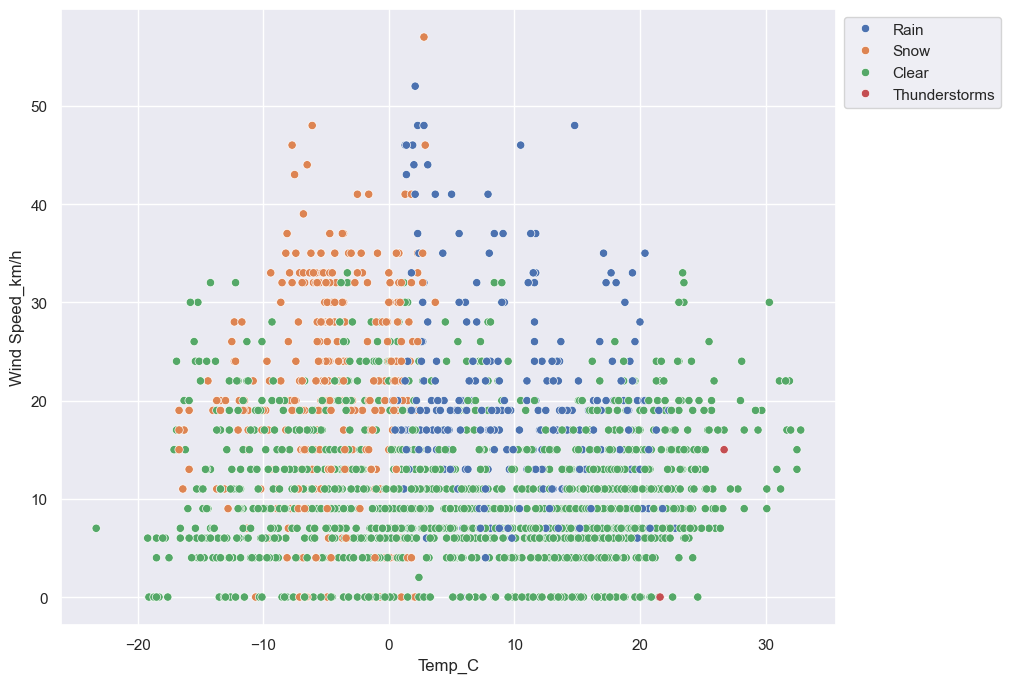

In [30]:
#To show a relationship btw temperature and wind speed for each Weather type as described in df2
sns.scatterplot(x='Temp_C', y='Wind Speed_km/h', 
                hue='Weather', data=df2 ) 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()

##CONCLUSION 
#We can clearly see that for the majority of the days the weather condition was 'Clear' 
#and the observed temparture was within the range of 10°C to 20°C for 'Clear' days with a wind speed ranging from 0 to 10 km/h

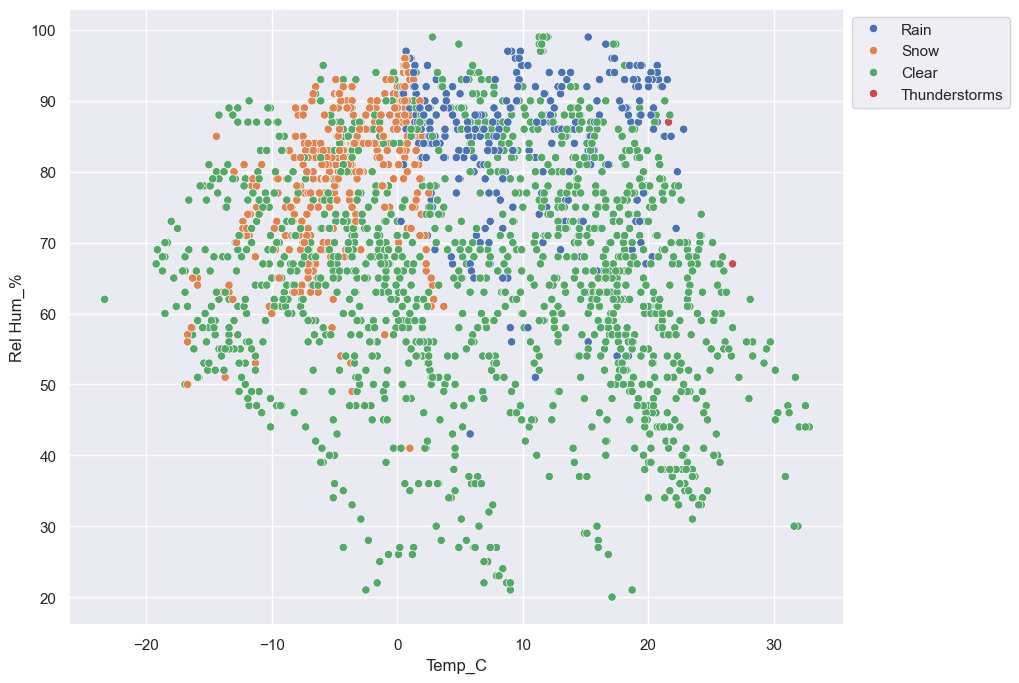

In [31]:
sns.scatterplot(x='Temp_C', y='Rel Hum_%', 
                hue='Weather', data=df2, ) 
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
  
plt.show()

5. **CORRELATION ANALYSIS**

In [32]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather',
       'Temp_Binned', 'Wind_Binned'],
      dtype='object')

In [33]:
df=df[['Date/Time', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km',
       'Press_kPa', 'Weather', 'Wind Speed_km/h', 'Wind_Binned', 'Temp_C', 'Temp_Binned'
      ]]

In [34]:
df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr(method='pearson')

#We can see the relationship of each variable with one another and that how do they vary accordingly

Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932714  -0.220182        -0.061876   
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   

                  Visibility_km  Press_kPa  
Temp_C                 0.273455  -0.236389  
Dew Point Temp_C       0.050813  -0.320616  
Rel Hum_%             -0.633683  -0.231424  
Wind Speed_km/h        0.004883  -0.356613  
Visibility_km          1.000000   0.231847  
Press_kPa              0.231847   1.000000

<Axes: >

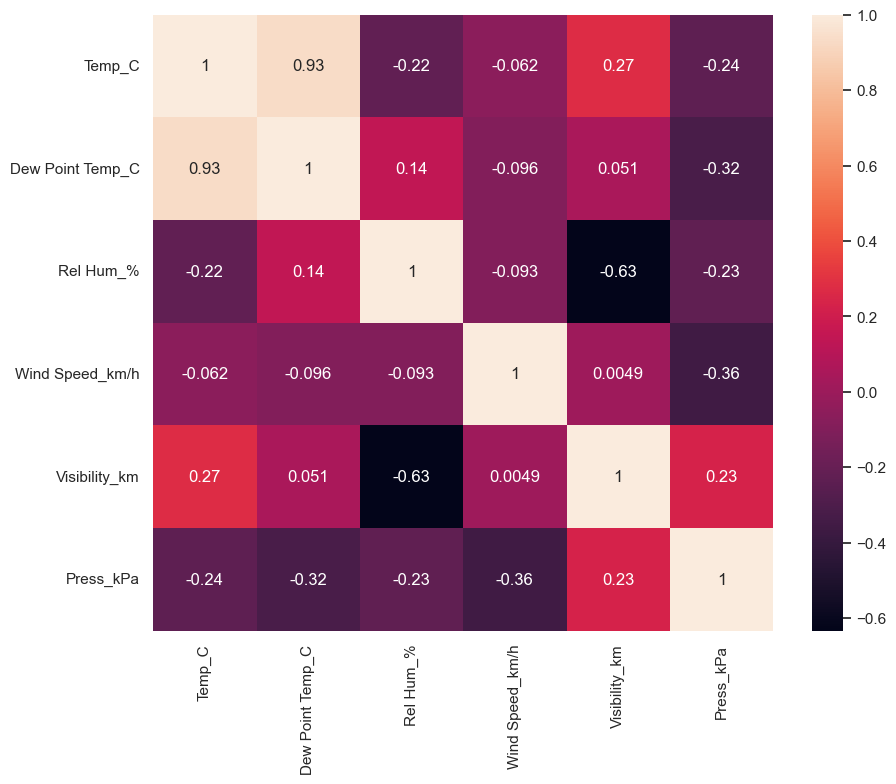

In [35]:
sns.heatmap(df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr(method='pearson'),annot=True)

#CONCLUSION
#Strong Positive Correlation Between Temp_C and Dew Point Temp_C.
#This suggests that as the temperature increases, the dew point temperature also tends to increase, and vice versa.
#Strong Negative Correlation btw humidity and visibility . Higher relative humidity is associated with significantly lower visibility.

6. **REGRESSION ANALYSIS**

In [36]:
# Create bins for the dataframe df1


bins = np.linspace(min(df['Temp_C']), max(df1['Temp_C']), 4)

temp_groups1 = ['Low', 'Medium', 'High']

df1['Temp_Binned'] = pd.cut(df1['Temp_C'], bins=bins, labels=temp_groups1, include_lowest=True)

temp_counts = df1['Temp_Binned'].value_counts().reindex(temp_groups1)

bins2 = np.linspace(min(df1['Wind Speed_km/h']), max(df['Wind Speed_km/h']), 4)

wind_groups1 = ['Slow', 'Moderate', 'Fast']

df1['Wind_Binned'] = pd.cut(df1['Wind Speed_km/h'], bins=bins2, labels=wind_groups1, include_lowest=True)

wind_counts = df['Wind_Binned'].value_counts().reindex(wind_groups1)


In [37]:
df1.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9         86                4   
1 2012-01-01 01:00:00    -1.8              -3.7         87                4   
2 2012-01-01 04:00:00    -1.5              -3.3         88                7   
3 2012-01-01 05:00:00    -1.4              -3.3         87                9   
4 2012-01-01 06:00:00    -1.5              -3.1         89                7   

   Visibility_km  Press_kPa Weather Temp_Binned Wind_Binned  
0            8.0     101.24     Fog      Medium        Slow  
1            8.0     101.24     Fog      Medium        Slow  
2            4.8     101.23     Fog      Medium        Slow  
3            6.4     101.27     Fog      Medium        Slow  
4            6.4     101.29     Fog      Medium        Slow

In [38]:
df1['Weather'].unique()

array(['Fog', 'Mostly Cloudy', 'Cloudy', 'Rain', 'Mainly Clear', 'Snow',
       'Clear', 'Haze', 'Thunderstorms'], dtype=object)

In [39]:
#Regression can only be done on  numerical dataset thus we perform 'HOT ONE ENCODING' to convert the object datatype to boolean datatype.

Weather_dummy=pd.get_dummies(df1['Weather'])
Weather_dummy

Clear  Cloudy    Fog   Haze  Mainly Clear  Mostly Cloudy   Rain   Snow  \
0     False   False   True  False         False          False  False  False   
1     False   False   True  False         False          False  False  False   
2     False   False   True  False         False          False  False  False   
3     False   False   True  False         False          False  False  False   
4     False   False   True  False         False          False  False  False   
...     ...     ...    ...    ...           ...            ...    ...    ...   
8088  False   False  False  False         False          False  False   True   
8089  False   False  False  False         False          False  False   True   
8090  False   False  False  False         False          False  False   True   
8091  False   False  False  False         False          False  False   True   
8092  False   False  False  False         False          False  False   True   

      Thunderstorms  
0             False  
1             False  
2             False  
3             False  
4             False  
...             ...  
8088          False  
8089          False  
8090          False  
8091          False  
8092          False  

[8093 rows x 9 columns]

In [40]:
#COMBINING THE NEWLY CREATED BOOLEAN WEATHER COLUMNS TO THE ORIGINAL DATAFRAME DF1
dataframe=pd.concat([df1,Weather_dummy],axis=1)

In [41]:
dataframe.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9         86                4   
1 2012-01-01 01:00:00    -1.8              -3.7         87                4   
2 2012-01-01 04:00:00    -1.5              -3.3         88                7   
3 2012-01-01 05:00:00    -1.4              -3.3         87                9   
4 2012-01-01 06:00:00    -1.5              -3.1         89                7   

   Visibility_km  Press_kPa Weather Temp_Binned Wind_Binned  Clear  Cloudy  \
0            8.0     101.24     Fog      Medium        Slow  False   False   
1            8.0     101.24     Fog      Medium        Slow  False   False   
2            4.8     101.23     Fog      Medium        Slow  False   False   
3            6.4     101.27     Fog      Medium        Slow  False   False   
4            6.4     101.29     Fog      Medium        Slow  False   False   

    Fog   Haze  Mainly Clear  Mostly Cloudy   Rain   Snow  Thunderstorms  
0  True  False         False          False  False  False          False  
1  True  False         False          False  False  False          False  
2  True  False         False          False  False  False          False  
3  True  False         False          False  False  False          False  
4  True  False         False          False  False  False          False

In [42]:
#As stated earlier Regression can only be done on  numerical dataset thus we perform 'LABEL ENCODING' to convert the object datatype to boolean datatype.

dataframe['Temp_Binned_Encoded'] = pd.factorize(dataframe['Temp_Binned'])[0]
dataframe['Wind_Binned_Encoded'] = pd.factorize(dataframe['Wind_Binned'])[0]
dataframe.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9         86                4   
1 2012-01-01 01:00:00    -1.8              -3.7         87                4   
2 2012-01-01 04:00:00    -1.5              -3.3         88                7   
3 2012-01-01 05:00:00    -1.4              -3.3         87                9   
4 2012-01-01 06:00:00    -1.5              -3.1         89                7   

   Visibility_km  Press_kPa Weather Temp_Binned Wind_Binned  ...  Cloudy  \
0            8.0     101.24     Fog      Medium        Slow  ...   False   
1            8.0     101.24     Fog      Medium        Slow  ...   False   
2            4.8     101.23     Fog      Medium        Slow  ...   False   
3            6.4     101.27     Fog      Medium        Slow  ...   False   
4            6.4     101.29     Fog      Medium        Slow  ...   False   

    Fog   Haze  Mainly Clear  Mostly Cloudy   Rain   Snow  Thunderstorms  \
0  True  False         False          False  False  False          False   
1  True  False         False          False  False  False          False   
2  True  False         False          False  False  False          False   
3  True  False         False          False  False  False          False   
4  True  False         False          False  False  False          False   

   Temp_Binned_Encoded  Wind_Binned_Encoded  
0                    0                    0  
1                    0                    0  
2                    0                    0  
3                    0                    0  
4                    0                    0  

[5 rows x 21 columns]

In [43]:
dataframe.drop('Weather',axis=1,inplace=True)
dataframe.drop('Temp_Binned',axis=1,inplace=True)
dataframe.drop('Wind_Binned',axis=1,inplace=True)


In [44]:
dataframe.head()

Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9         86                4   
1 2012-01-01 01:00:00    -1.8              -3.7         87                4   
2 2012-01-01 04:00:00    -1.5              -3.3         88                7   
3 2012-01-01 05:00:00    -1.4              -3.3         87                9   
4 2012-01-01 06:00:00    -1.5              -3.1         89                7   

   Visibility_km  Press_kPa  Clear  Cloudy   Fog   Haze  Mainly Clear  \
0            8.0     101.24  False   False  True  False         False   
1            8.0     101.24  False   False  True  False         False   
2            4.8     101.23  False   False  True  False         False   
3            6.4     101.27  False   False  True  False         False   
4            6.4     101.29  False   False  True  False         False   

   Mostly Cloudy   Rain   Snow  Thunderstorms  Temp_Binned_Encoded  \
0          False  False  False          False                    0   
1          False  False  False          False                    0   
2          False  False  False          False                    0   
3          False  False  False          False                    0   
4          False  False  False          False                    0   

   Wind_Binned_Encoded  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

In [45]:
dataframe.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Clear', 'Cloudy',
       'Fog', 'Haze', 'Mainly Clear', 'Mostly Cloudy', 'Rain', 'Snow',
       'Thunderstorms', 'Temp_Binned_Encoded', 'Wind_Binned_Encoded'],
      dtype='object')

In [46]:
dataframe=dataframe[[ 'Date/Time','Clear', 'Cloudy', 'Fog',
       'Haze', 'Rain', 'Snow', 'Thunderstorms', 'Dew Point Temp_C', 'Rel Hum_%', 'Visibility_km',
       'Press_kPa',  
       'Wind Speed_km/h','Wind_Binned_Encoded', 'Temp_Binned_Encoded','Temp_C']]

7. **DIVIDING INTO TARGET AND PREDICTOR VALUE**

In [47]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8093 entries, 0 to 8092
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   Date/Time            8093 non-null   datetime64[s]
 1   Clear                8093 non-null   bool         
 2   Cloudy               8093 non-null   bool         
 3   Fog                  8093 non-null   bool         
 4   Haze                 8093 non-null   bool         
 5   Rain                 8093 non-null   bool         
 6   Snow                 8093 non-null   bool         
 7   Thunderstorms        8093 non-null   bool         
 8   Dew Point Temp_C     8093 non-null   float64      
 9   Rel Hum_%            8093 non-null   int64        
 10  Visibility_km        8093 non-null   float64      
 11  Press_kPa            8093 non-null   float64      
 12  Wind Speed_km/h      8093 non-null   int64        
 13  Wind_Binned_Encoded  8093 non-null   int64      

In [48]:
#predictor value
X=dataframe.iloc[:,1:15]

#target value
y=dataframe.iloc[:,-1:]


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train , X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=102)

In [51]:
dataframe.head()

Date/Time  Clear  Cloudy   Fog   Haze   Rain   Snow  \
0 2012-01-01 00:00:00  False   False  True  False  False  False   
1 2012-01-01 01:00:00  False   False  True  False  False  False   
2 2012-01-01 04:00:00  False   False  True  False  False  False   
3 2012-01-01 05:00:00  False   False  True  False  False  False   
4 2012-01-01 06:00:00  False   False  True  False  False  False   

   Thunderstorms  Dew Point Temp_C  Rel Hum_%  Visibility_km  Press_kPa  \
0          False              -3.9         86            8.0     101.24   
1          False              -3.7         87            8.0     101.24   
2          False              -3.3         88            4.8     101.23   
3          False              -3.3         87            6.4     101.27   
4          False              -3.1         89            6.4     101.29   

   Wind Speed_km/h  Wind_Binned_Encoded  Temp_Binned_Encoded  Temp_C  
0                4                    0                    0    -1.8  
1                4                    0                    0    -1.8  
2                7                    0                    0    -1.5  
3                9                    0                    0    -1.4  
4                7                    0                    0    -1.5

In [52]:
#Perform feature Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train.iloc[:,-2:]=ss.fit_transform(X_train.iloc[:,-2:])


C:\Users\Aarya\AppData\Local\Temp\ipykernel_852\1000677438.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.30781856 -0.30781856 -0.30781856 ... -0.30781856 -0.30781856
 -0.30781856]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.iloc[:,-2:]=ss.fit_transform(X_train.iloc[:,-2:])
C:\Users\Aarya\AppData\Local\Temp\ipykernel_852\1000677438.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.164823    0.07412816 -1.01656667 ... -1.01656667  1.164823
 -1.01656667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.iloc[:,-2:]=ss.fit_transform(X_train.iloc[:,-2:])


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Choose a regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the target on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()


Mean Squared Error: 0.5933017662473955
R-squared: 0.9957907477734355
